<a href="https://colab.research.google.com/github/marialeones/Aprendendo_A_Programar/blob/main/Aula_analise_De_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 

#Lendo a base de dados 

In [ ]:
#lendo a base de dados 
base_credit = pd.read_csv('/content/base_processada.csv')
base_credit

,Unnamed: 0,IDC_Cliente,Renda,Idade,Divida,Devedor
0,0,1,66155.925095,59.017015,8106.532131,0
1,1,2,34415.153966,48.117153,6564.745018,0
2,2,3,57317.170063,63.108049,8020.953296,0
3,3,4,42709.534201,45.751972,6103.642260,0
4,4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...,...
1995,1995,1996,59221.044874,48.518179,1926.729397,0
1996,1996,1997,69516.127573,23.162104,3503.176156,0
1997,1997,1998,44311.449262,28.017167,5522.786693,1
1998,1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit = base_credit.drop('Unnamed: 0' , axis = 1)

In [ ]:
#base_credit = base_credit.drop('IDC_Cliente' , axis = 1)

In [ ]:
base_credit

,IDC_Cliente,Renda,Idade,Divida,Devedor
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values

In [ ]:
y_credit = base_credit.iloc[:, 4].values


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_credit, y_credit)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.21140993, 0.39769951, 0.39089056])

In [ ]:
arvore_risco_credito.classes_

array([0, 1])

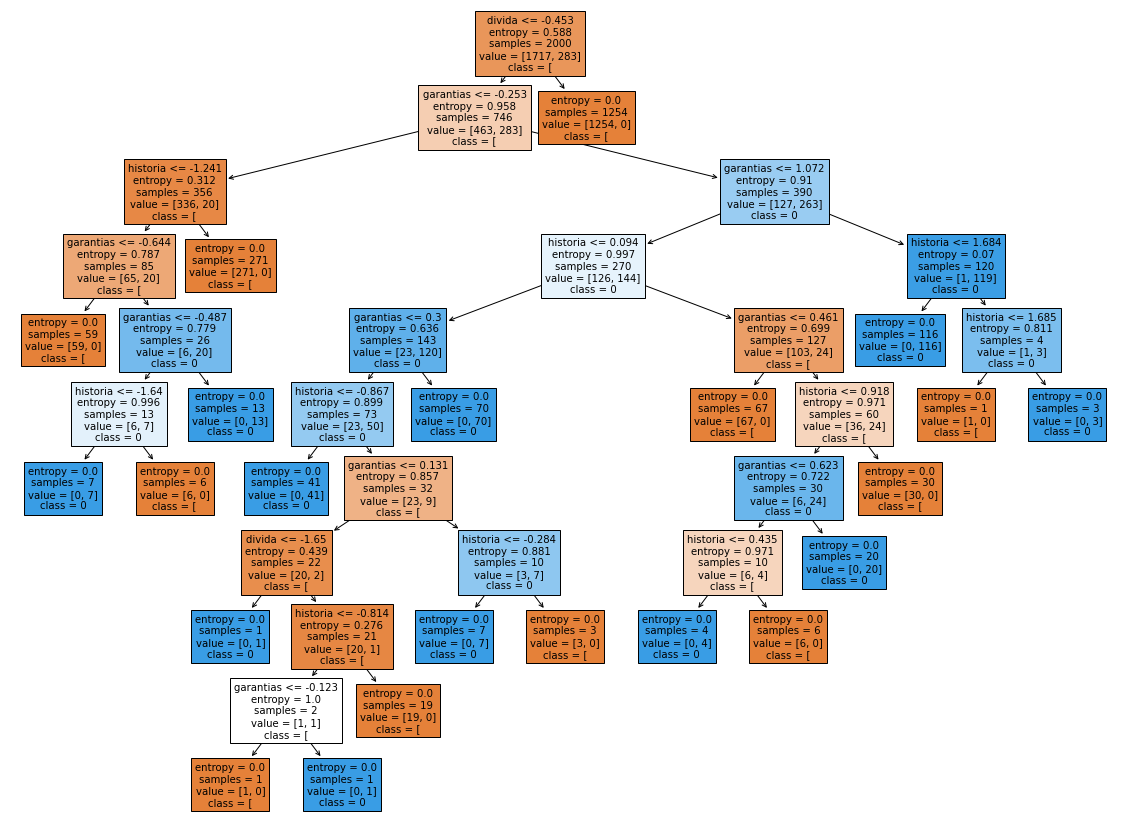

In [ ]:
from sklearn import tree
previsores = ['historia', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,15))

tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names= str(arvore_risco_credito.classes_) , filled=True);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25)

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.988

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)